<a href="https://colab.research.google.com/github/supatsara2002/bsc_dpdm22/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# import data

In [ ]:
wine_data = pd.read_csv('/content/drive/MyDrive/Data Mining/Project Final/winemag-data_first150k.csv')
wine_data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


# ตรวจสอบ Missing

In [ ]:
wine_data.isnull().any()

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [ ]:
wine_data_clean = wine_data.dropna()

In [ ]:
wine_data_clean.isnull().any()

Unnamed: 0     False
country        False
description    False
designation    False
points         False
price          False
province       False
region_1       False
region_2       False
variety        False
winery         False
dtype: bool

# Classification

##DecisionTree

In [ ]:
#กำหนด features และ target
X = wine_data_clean[['points', 'price']]
y = wine_data_clean['variety']

#แบ่งข้อมูลออกเป็น training set และ test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

#สร้าง model และ train ด้วย training set
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=3,min_samples_leaf=5,max_depth=4)
dtc.fit(X_train, y_train)

#ทำการ predict ด้วย test set
y_pred = dtc.predict(X_test)

#คำนวณค่า accuracy ของ model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.2541725060517263


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

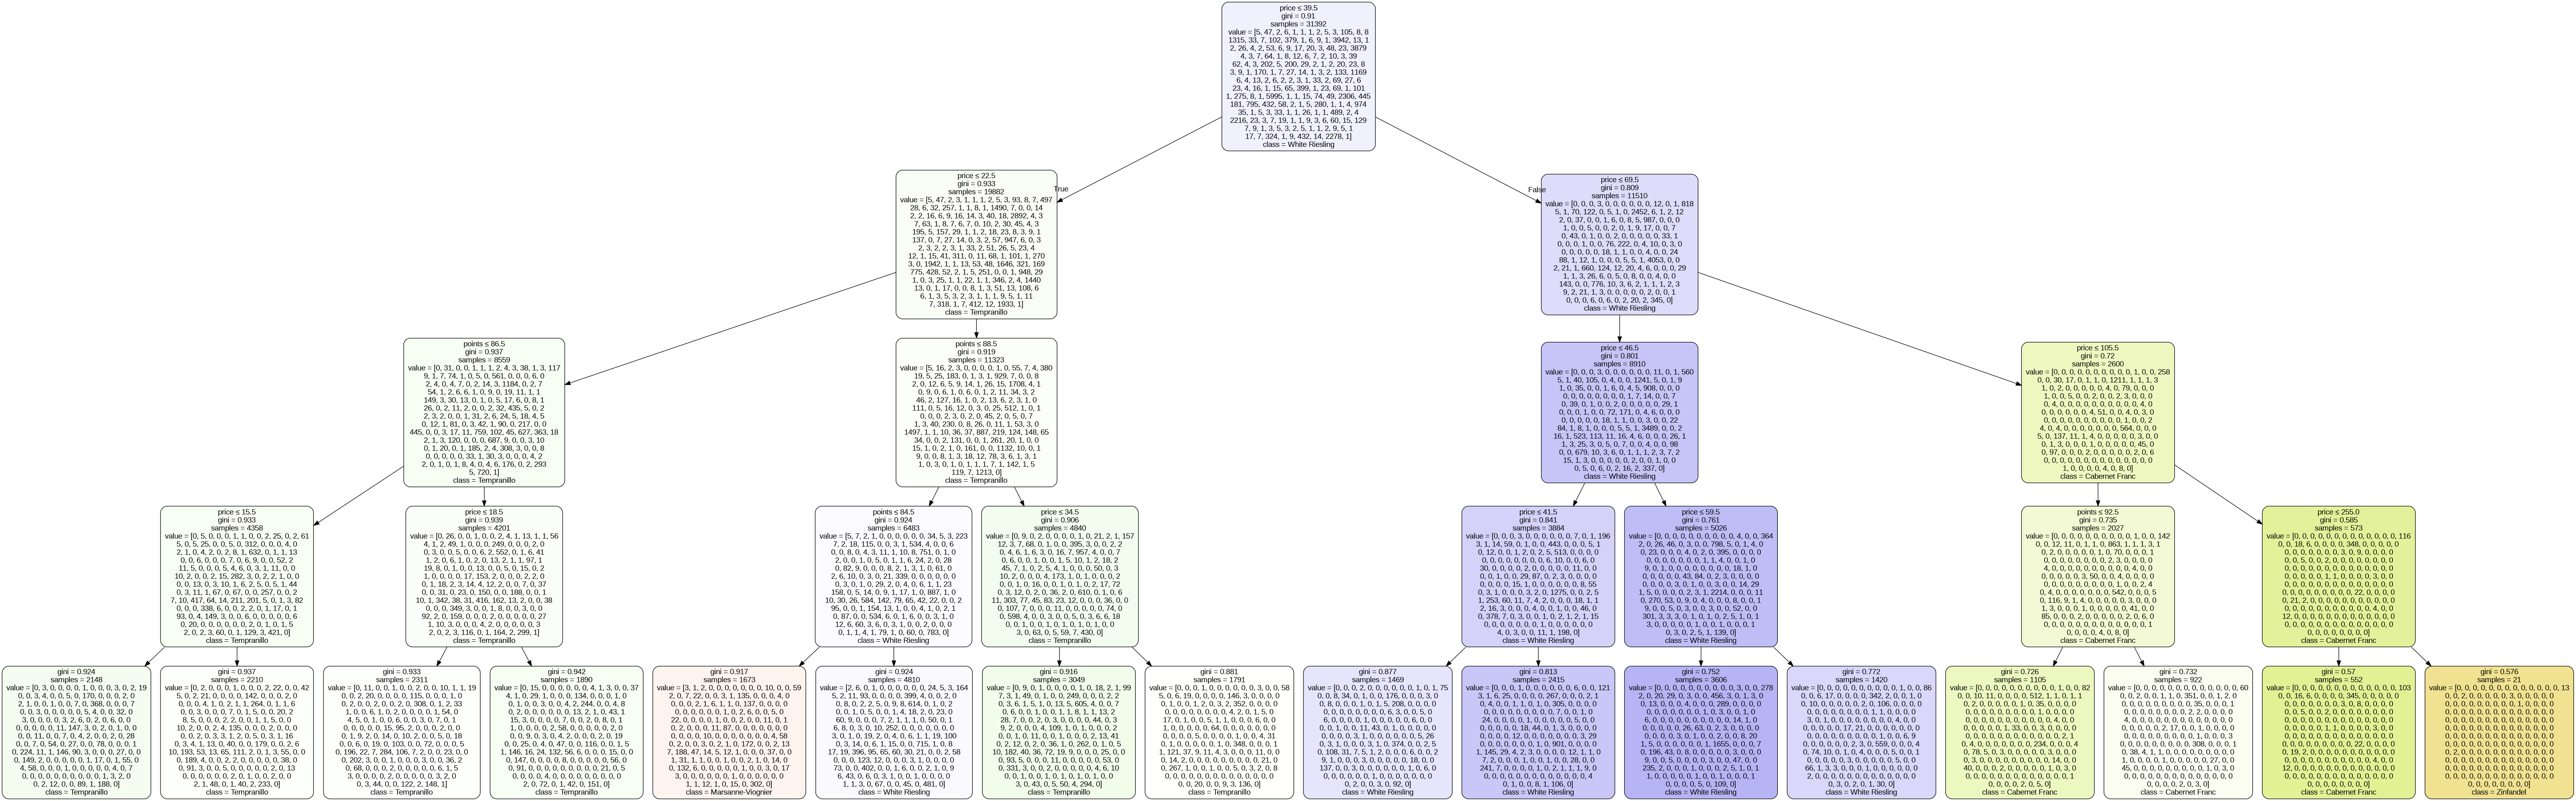

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

dot_data = export_graphviz(dtc, out_file=None, 
                           feature_names=X.columns,  
                           class_names=y.unique(),  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
Image(graph.pipe(format='png'))

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dtc)

DecisionTree ได้ค่า Accuracy: 0.2541725060517263

##Naive Bays

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
# เลือกเฉพาะคอลัมน์ "variety" และ "description"
wine_data2 = wine_data_clean[["variety", "description"]]

# แปลงคอลัมน์ "variety" เป็นตัวเลขโดยใช้ LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
wine_data2["variety_num"] = le.fit_transform(wine_data2["variety"])

# แบ่งข้อมูลเป็นชุด train และ test โดยสุ่มอัตราส่วน 70:30
train_data, test_data, train_labels, test_labels = train_test_split(
    wine_data2["description"], wine_data2["variety_num"], test_size=0.3, random_state=3)

# แปลงข้อมูลข้อความเป็นเวกเตอร์จำนวนเต็มโดยใช้ CountVectorizer
cv = CountVectorizer()
train_vectors = cv.fit_transform(train_data)
test_vectors = cv.transform(test_data)

# สร้างโมเดล Naive Bayes และฝึกโมเดลด้วยชุด train
nb_model = MultinomialNB()
nb_model.fit(train_vectors, train_labels)

# ใช้โมเดลทำนายค่า test
predicted_labels = nb_model.predict(test_vectors)

# คำนวณค่าความแม่นยำของโมเดล
accuracy = accuracy_score(test_labels, predicted_labels)
print("Accuracy:", accuracy)

<ipython-input-12-869fc4138a72>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data2["variety_num"] = le.fit_transform(wine_data2["variety"])


Accuracy: 0.632549052917693


Naive Bays ได้ค่า Accuracy: 0.632549052917693

##k-Nearest Neighbor

In [ ]:
import pandas as pd
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split

# สร้าง LabelEncoder object สำหรับแปลงข้อมูลของคอลัมน์ 'variety' เป็นตัวเลข
le = preprocessing.LabelEncoder()
wine_data_clean['variety'] = le.fit_transform(wine_data_clean['variety'])

# เลือกเฉพาะคอลัมน์ที่เป็นตัวเลขมาใช้ในการ Train Model
X = wine_data_clean[['price', 'points', 'variety']]

# แยกข้อมูล Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X, wine_data_clean['price'], test_size=0.2)

# สร้าง Model ของ k-Nearest Neighbor
clf = neighbors.KNeighborsRegressor()

# Train Model ด้วยข้อมูล Train
clf.fit(X_train, y_train)

# ทดสอบ Model ด้วยข้อมูล Test
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9996956990456206


<ipython-input-13-cdb55e47ba96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_data_clean['variety'] = le.fit_transform(wine_data_clean['variety'])


k-Nearest Neighbor ได้ค่า accuracy: 0.9888577583467251

##k-Means Clustering

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

In [ ]:
#เลือกเฉพาะคอลัมน์ description เพื่อนำมาแยกกลุ่ม
df = wine_data['description']

In [ ]:
#ใช้ CountVectorizerเพื่อแปลงข้อความให้เป็นตัวเลข
count_vectorizer = CountVectorizer(stop_words='english', ngram_range=(1,1))
X = count_vectorizer.fit_transform(df)

# fit and transform the corpus to create the tf-idf matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

#กำหนดจำนวนกลุ่มที่ต้องการแบ่งเป็น k กลุ่ม
k = 5

NameError: ignored

In [ ]:
#ใช้ KMeans ในการแบ่งกลุ่ม
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=5, n_init=1)

In [ ]:
#แสดงผลลัพธ์ด้วยการพิมพ์ top terms ของแต่ละกลุ่ม
cluster_results = []
top_terms_per_cluster = {}
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vectorizer.vocabulary_
for i in range(k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print(' %s' % list(terms.keys())[list(terms.values()).index(ind)], end=',')
    print()

Top terms per cluster:
Cluster 0: oak, flavors, wine, fruit, cherry, finish, tannins, vanilla, sweet, rich,
Cluster 1: wine, flavors, acidity, tannins, ripe, dry, aromas, drink, rich, cherry,
Cluster 2: black, flavors, cherry, tannins, wine, fruit, aromas, palate, finish, plum,
Cluster 3: fruit, wine, flavors, finish, aromas, acidity, ripe, palate, tannins, spice,
Cluster 4: flavors, finish, aromas, palate, acidity, dry, cherry, sweet, drink, notes,


In [ ]:
cluster_results = []
top_terms_per_cluster = {}
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vectorizer.vocabulary_

for i in range(k):
    cluster = {}
    top_terms = []
    for ind in order_centroids[i, :10]:
        top_terms.append(list(terms.keys())[list(terms.values()).index(ind)])
    top_terms_per_cluster['Cluster {}'.format(i)] = top_terms

In [ ]:
top_terms_per_cluster

In [ ]:
cluster_results = []
top_terms_per_cluster = {}
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vectorizer.vocabulary_

for i in range(k):
    cluster = {}
    top_terms = []
    for ind in order_centroids[i, :10]:
        top_terms.append(list(terms.keys())[list(terms.values()).index(ind)])
    top_terms_per_cluster['Cluster {}'.format(i)] = top_terms

top_terms_per_cluster = pd.DataFrame.from_dict(top_terms_per_cluster, orient='index')
pca = PCA(n_components=2)
pca.fit(tfidf_matrix.toarray())
pca_features = pca.transform(tfidf_matrix.toarray())
top_terms_per_cluster['PCA1'] = pca_features[:,0]
top_terms_per_cluster['PCA2'] = pca_features[:,1]

NameError: ignored

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="PCA1", y="PCA2", hue=model.labels_, data=top_terms_per_cluster, palette='Set1')
plt.title('Wine Reviews Clusters')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
top_terms_per_cluster = pd.DataFrame.from_dict(cluster_results)
top_terms_per_cluster = top_terms_per_cluster.rename(columns={'0': 'PCA1', '1': 'PCA2'})

In [ ]:
top_terms_per_cluster

""


In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="PCA1", y="PCA2", hue=model.labels_, data=top_terms_per_cluster, palette='Set1')
plt.title('Wine Reviews Clusters')
plt.show()

ValueError: ignored

<Figure size 864x576 with 0 Axes>

In [ ]:
# ทดสอบการทำนายด้วย text จาก dataset
Y = count_vectorizer.transform(["This wine has a good acidity and a long finish"])
prediction = model.predict(Y)
print(prediction)

[1]


##Association Rules

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
# กำหนดเงื่อนไขในการกรองข้อมูลโดยต้องเป็นไวน์ที่มาจากประเทศ US และมีคะแนน 90 ขึ้นไป
conditions = (wine_data['country'] == 'US') & (wine_data['points'] >= 90)

In [ ]:
# กรองข้อมูลชื่อสายพันธุ์ (variety) และชื่อโรงเรียนผลิตไวน์ (winery)
df_filtered = wine_data.loc[conditions, ['variety', 'winery']]

In [ ]:
# ลบ missing values
df_filtered.dropna(inplace=True)

In [ ]:
# แปลงข้อมูลเป็น list of list
transactions = df_filtered.values.tolist()

In [ ]:
# สร้าง TransactionEncoder object
te = TransactionEncoder()

In [ ]:
# ใช้ TransactionEncoder object แปลงข้อมูล
te_ary = te.fit(transactions).transform(transactions)

In [ ]:
# แปลงข้อมูลเป็น DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# หา itemsets ที่มีความถี่อย่างน้อย 0.001
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.001156,(Abacela)
1,0.002841,(Abeja)
2,0.001011,(Adelaida)
3,0.003660,(Adelsheim)
4,0.001734,(Albariño)
...,...,...
403,0.001830,"(Schramsberg, Sparkling Blend)"
404,0.001204,"(Syrah, Terre Rouge)"
405,0.001059,"(Syrah, Walter Dacon)"
406,0.001108,"(Syrah, Zaca Mesa)"


In [ ]:
# หา association rules โดยกำหนดค่าความน่าสนใจของ association rules เป็น lift >= 1.5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Abeja),(Cabernet Sauvignon),0.002841,0.190850,0.001156,0.406780,2.131410,0.000614,1.363996
1,(Cabernet Sauvignon),(Abeja),0.190850,0.002841,0.001156,0.006056,2.131410,0.000614,1.003234
2,(Adelsheim),(Pinot Noir),0.003660,0.222538,0.002071,0.565789,2.542441,0.001256,1.790519
3,(Pinot Noir),(Adelsheim),0.222538,0.003660,0.002071,0.009305,2.542441,0.001256,1.005698
4,(Red Blend),(Andrew Will),0.044113,0.002649,0.001541,0.034934,13.189361,0.001424,1.033455
...,...,...,...,...,...,...,...,...,...
217,(Walter Dacon),(Syrah),0.001300,0.084325,0.001059,0.814815,9.662838,0.000950,4.944647
218,(Syrah),(Zaca Mesa),0.084325,0.002071,0.001108,0.013135,6.343153,0.000933,1.011212
219,(Zaca Mesa),(Syrah),0.002071,0.084325,0.001108,0.534884,6.343153,0.000933,1.968702
220,(Williams Selyem),(Zinfandel),0.014736,0.041801,0.001589,0.107843,2.579911,0.000973,1.074025


In [ ]:
# เรียงลำดับ association rules ตามค่า lift จากมากไปน้อย
rules = rules.sort_values(by=['lift'], ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
126,(Robert Mondavi),(Fumé Blanc),0.003323,0.001782,0.001011,0.304348,170.804935,0.001005,1.434939
127,(Fumé Blanc),(Robert Mondavi),0.001782,0.003323,0.001011,0.567568,170.804935,0.001005,2.304816
175,(Sparkling Blend),(Mumm Napa),0.012473,0.001974,0.001974,0.158301,80.173745,0.001950,1.185728
174,(Mumm Napa),(Sparkling Blend),0.001974,0.012473,0.001974,1.000000,80.173745,0.001950,inf
150,(Sémillon),(L'Ecole No. 41),0.003419,0.004864,0.001252,0.366197,75.287965,0.001235,1.570104
...,...,...,...,...,...,...,...,...,...
156,(Longoria),(Pinot Noir),0.002745,0.222538,0.001011,0.368421,1.655543,0.000400,1.230982
99,(Chardonnay),(Williams Selyem),0.128389,0.014736,0.002986,0.023256,1.578127,0.001094,1.008722
98,(Williams Selyem),(Chardonnay),0.014736,0.128389,0.002986,0.202614,1.578127,0.001094,1.093086
41,(Cabernet Sauvignon),(Kendall-Jackson),0.190850,0.004768,0.001397,0.007318,1.534867,0.000487,1.002569


lift คือค่าที่บ่งบอกถึงความสัมพันธ์ของสินค้า โดย lift มากกว่า 1 แสดงว่าการซื้อสินค้า A จะเป็นที่เป็นไปได้สูงขึ้นเมื่อลูกค้าซื้อสินค้า B ด้วย

In [ ]:
# แสดงผลลัพธ์
print(rules.head())

           antecedents        consequents  antecedent support  \
126   (Robert Mondavi)       (Fumé Blanc)            0.003323   
127       (Fumé Blanc)   (Robert Mondavi)            0.001782   
175  (Sparkling Blend)        (Mumm Napa)            0.012473   
174        (Mumm Napa)  (Sparkling Blend)            0.001974   
150         (Sémillon)   (L'Ecole No. 41)            0.003419   

     consequent support   support  confidence        lift  leverage  \
126            0.001782  0.001011    0.304348  170.804935  0.001005   
127            0.003323  0.001011    0.567568  170.804935  0.001005   
175            0.001974  0.001974    0.158301   80.173745  0.001950   
174            0.012473  0.001974    1.000000   80.173745  0.001950   
150            0.004864  0.001252    0.366197   75.287965  0.001235   

     conviction  
126    1.434939  
127    2.304816  
175    1.185728  
174         inf  
150    1.570104  


จากการทำAssociation Rules พบว่าลูกค้าส่วนใหญ่ซื้อRobert Mondav จะซื้อFumé Blancด้วย ซึ่งมีค่า lift สูงที่สุด